## Unit 39 - Financial Data Analysis Mini Project

In [1]:
# Step 1 - Let's prepare for data acquisition and create data acquisition functions
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [2]:
# A Function that obtains the stock price for a given stock when the ticker code is input
def get_stock_data(ticker, start, end):
    try:
        data = yf.download(ticker, start=start, end=end)
        # print(data.head())  # Print the first few rows of data to understand its structure
        data.insert(0, "Ticker", ticker)
        return data
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

In [3]:
# to test whether data data acquisition work properly, enter Disney's ticker code to test the function
ticker = "DIS"
start = datetime(2020, 1, 1)
end = datetime.today()

In [4]:
# Example usage
stock_data = get_stock_data(ticker, start, end)
stock_data.head()
# if stock_data is not None:
#     print(stock_data.head())
# else:
#     print("Failed to fetch stock data.")

[*********************100%%**********************]  1 of 1 completed


,Ticker,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-01-02,DIS,145.289993,148.199997,145.100006,148.199997,147.718567,9502100
2020-01-03,DIS,146.399994,147.899994,146.050003,146.500000,146.024094,7320200
2020-01-06,DIS,145.539993,146.029999,144.309998,145.649994,145.176849,8262500
2020-01-07,DIS,145.990005,146.869995,145.419998,145.699997,145.226685,6906500
2020-01-08,DIS,145.490005,146.130005,144.820007,145.399994,144.927658,6984200


In [16]:
stock_data = stock_data.pivot(index=None, columns="Ticker", values="Close")
stock_data.head()

Ticker,DIS
Date,
2020-01-02,148.199997
2020-01-03,146.500000
2020-01-06,145.649994
2020-01-07,145.699997
2020-01-08,145.399994


In [17]:
SPY = get_stock_data("SPY", start, end)
IYW = get_stock_data("IYW", start, end)
VT = get_stock_data("VT", start, end)
DBA = get_stock_data("DBA", start, end)
TLT = get_stock_data("TLT", start, end)
PDBC = get_stock_data("PDBC", start, end)
IAU = get_stock_data("IAU", start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [18]:
SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1011 entries, 2020-01-02 to 2024-01-08
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     1011 non-null   object 
 1   Open       1011 non-null   float64
 2   High       1011 non-null   float64
 3   Low        1011 non-null   float64
 4   Close      1011 non-null   float64
 5   Adj Close  1011 non-null   float64
 6   Volume     1011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 63.2+ KB


In [19]:
# Executing pivot per data frame
SPY = SPY.pivot(index=None, columns="Ticker", values="Close")
IYW = IYW.pivot(index=None, columns="Ticker", values="Close")
VT = VT.pivot(index=None, columns="Ticker", values="Close")
DBA = DBA.pivot(index=None, columns="Ticker", values="Close")
TLT = TLT.pivot(index=None, columns="Ticker", values="Close")
PDBC = PDBC.pivot(index=None, columns="Ticker", values="Close")
IAU = IAU.pivot(index=None, columns="Ticker", values="Close")

In [20]:
# Step 2 - Each created data frame is combined into one data frame for efficient analysis
stock = pd.concat(
    [
        SPY,
        IYW,
        VT,
        DBA,
        TLT,
        PDBC,
        IAU,
    ],
    axis=1,
    join="outer",
)
stock.head()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,324.869995,59.355000,81.809998,16.500000,137.009995,16.639999,29.219999
2020-01-03,322.410004,58.762501,81.070000,16.309999,139.119995,16.780001,29.620001
2020-01-06,323.640015,59.125000,81.370003,16.350000,138.330002,16.799999,29.920000
2020-01-07,322.730011,59.147499,81.120003,16.389999,137.649994,16.770000,30.040001
2020-01-08,324.450012,59.737499,81.449997,16.309999,136.740005,16.540001,29.820000


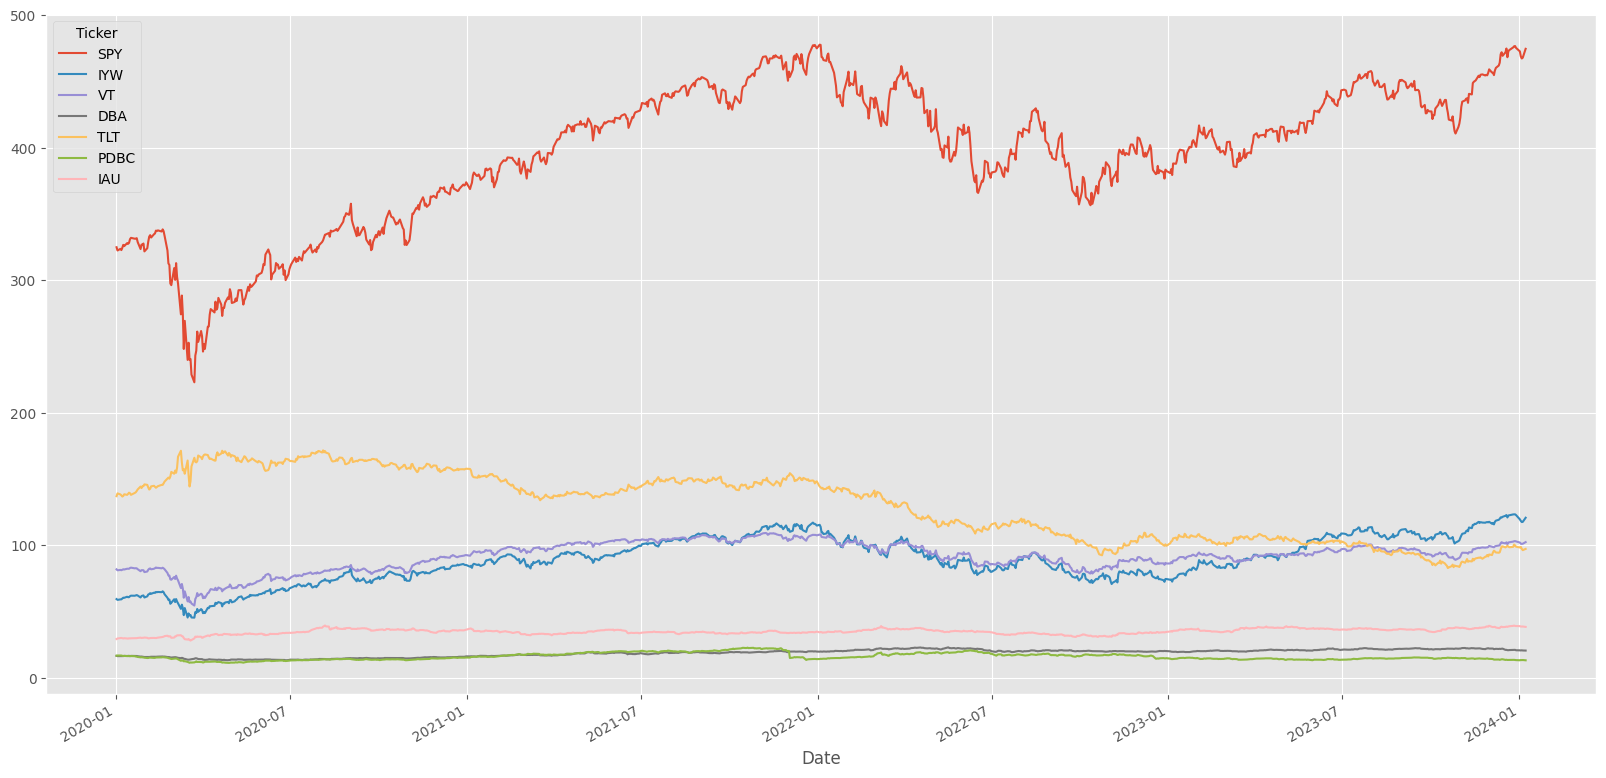

In [21]:
# Step 3 - if you draw a graph based on the closing price data on time series basis(date), you can check the stock price movement. By overlapping the graphs of each ticker, you can see the approximate correlation.
plt.style.use("ggplot")
stock.plot(figsize=(20, 10))
plt.show()

In [22]:
covid = stock["2020-2-1":"2020-7-31"]

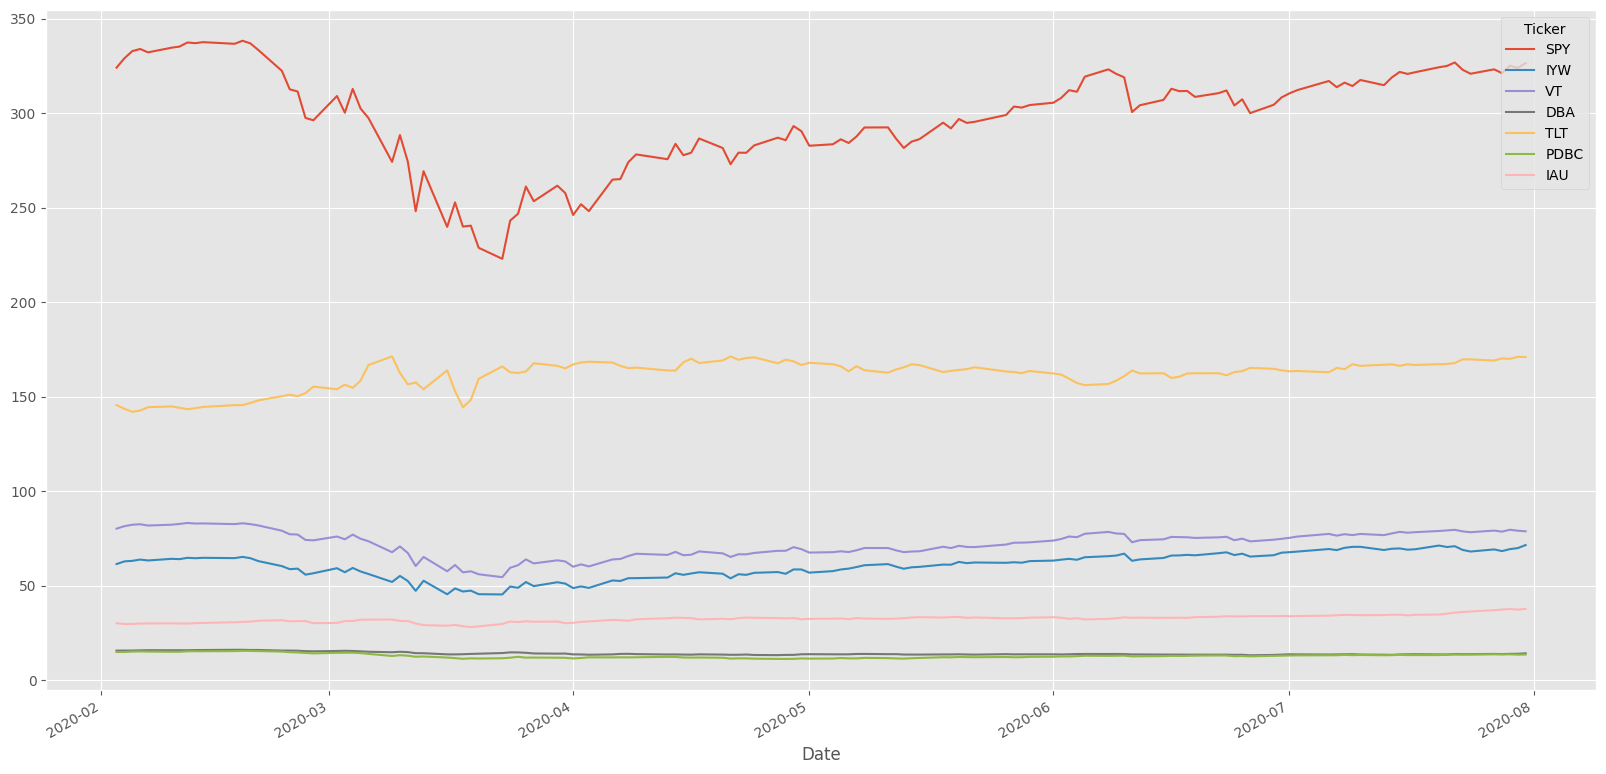

In [23]:
plt.style.use("ggplot")
covid.plot(figsize=(20, 10))
plt.show()

In [24]:
# Seperate the relevant period factors to check the graph
x = covid.index
s_y = covid[["SPY"]]
i_y = covid[["IAU"]]
d_y = covid[["DBA"]]
t_y = covid[["TLT"]]

Text(0.5, 0.98, 'Covid 19')

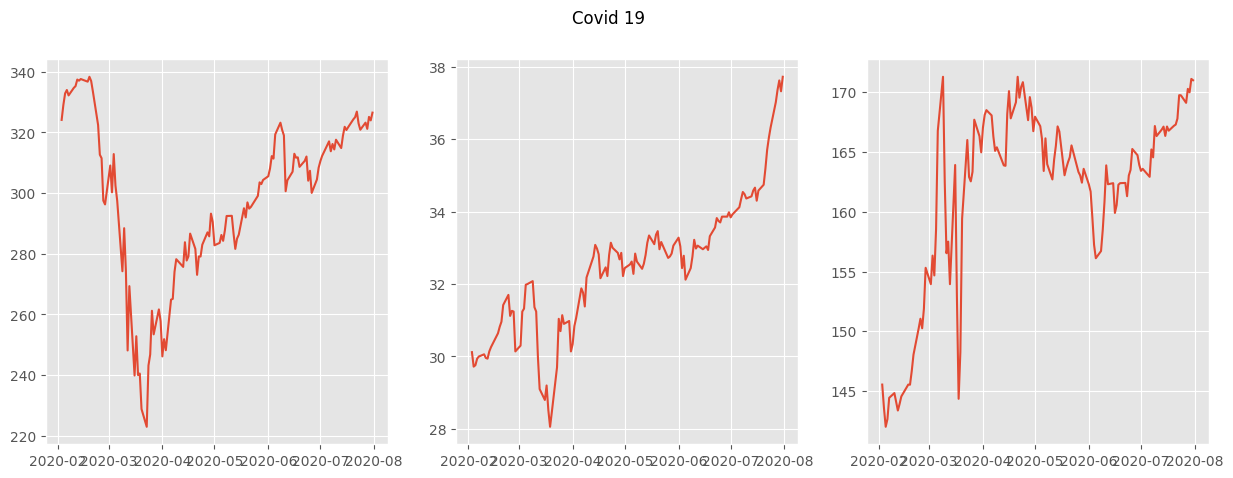

In [25]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(x, s_y)
axs[1].plot(x, i_y)
axs[2].plot(x, t_y)

fig.suptitle("Covid 19")

In [27]:
# Step 4 - Let's visualize the trading volume data in the form of a bar graph for a specific ticker.
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt


def get_stock_data(ticker, start, end):
    try:
        data = yf.download(ticker, start=start, end=end)
        # print(data.head())  # Print the first few rows of data to understand its structure
        data.insert(0, "Ticker", ticker)
        return data
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None


# Example usage
ticker = "PDBC"
start = datetime(2020, 1, 1)
end = datetime.today()

df = get_stock_data(ticker, start, end)
df.head()
# if df is not None:
#     print(df.head())
# else:
#     print("Failed to fetch stock data.")

[*********************100%%**********************]  1 of 1 completed


,Ticker,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-01-02,PDBC,16.570000,16.670000,16.520000,16.639999,9.154050,4004600
2020-01-03,PDBC,16.809999,16.840000,16.709999,16.780001,9.231068,760200
2020-01-06,PDBC,16.900000,16.910000,16.770000,16.799999,9.242070,1608700
2020-01-07,PDBC,16.750000,16.799999,16.716999,16.770000,9.225567,1723200
2020-01-08,PDBC,16.770000,16.770000,16.363001,16.540001,9.099040,923300


In [28]:
# Delete all except the volume column.
df.drop(["Ticker", "Open", "High", "Low", "Close", "Adj Close"], axis=1, inplace=True)

In [29]:
df.head()

,Volume
Date,
2020-01-02,4004600
2020-01-03,760200
2020-01-06,1608700
2020-01-07,1723200
2020-01-08,923300


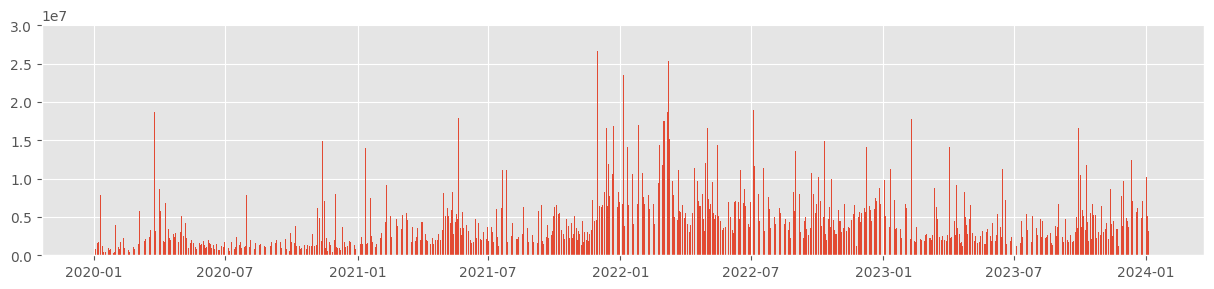

In [30]:
x = df.index
y = df["Volume"]
plt.figure(figsize=(15, 3))
plt.bar(x, y)
plt.show()

In [31]:
ticker = "PDBC"
start = datetime(2020, 1, 1)
end = datetime.today()

df = get_stock_data(ticker, start, end)
df.head()
# if df is not None:
#     print(df.head())
# else:
#     print("Failed to fetch stock data.")

[*********************100%%**********************]  1 of 1 completed


,Ticker,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-01-02,PDBC,16.570000,16.670000,16.520000,16.639999,9.154051,4004600
2020-01-03,PDBC,16.809999,16.840000,16.709999,16.780001,9.231069,760200
2020-01-06,PDBC,16.900000,16.910000,16.770000,16.799999,9.242069,1608700
2020-01-07,PDBC,16.750000,16.799999,16.716999,16.770000,9.225567,1723200
2020-01-08,PDBC,16.770000,16.770000,16.363001,16.540001,9.099039,923300


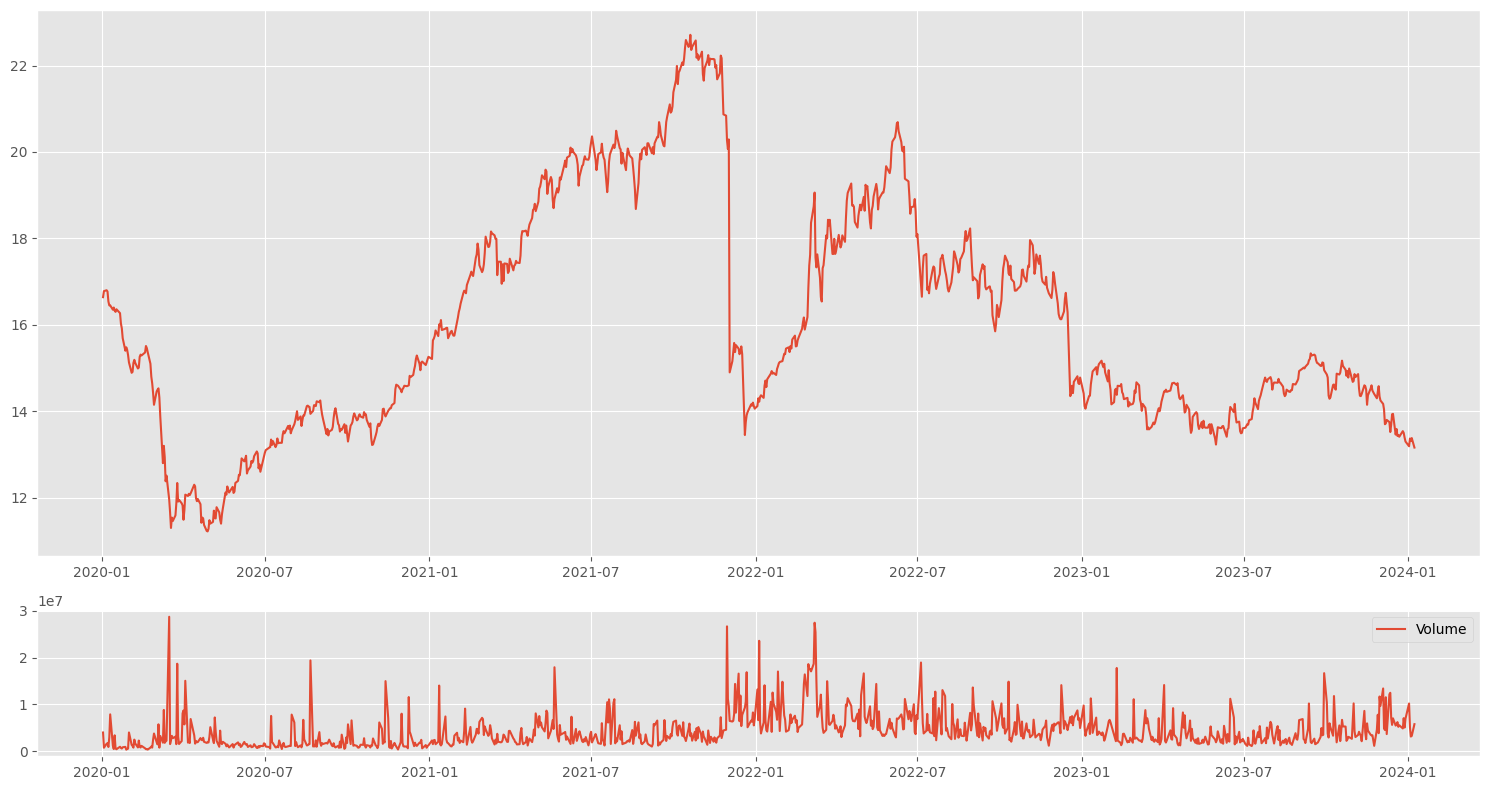

In [32]:
# Step 5 - Using matplotlib's subplot2grid, the graph of the closing price is visualized in the upper layout and the training volume in the same period is visualized in the lower layout.
fig = plt.figure(figsize=(15, 8))

top_grid = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
bottom_grid = plt.subplot2grid((4, 4), (3, 0), rowspan=1, colspan=4)

top_grid.plot(df.index, df["Close"], label="Close")
bottom_grid.plot(df.index, df["Volume"], label="Volume")

plt.tight_layout()

plt.legend()
plt.show()

In [33]:
# Step 6
stock.head()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,324.869995,59.355000,81.809998,16.500000,137.009995,16.639999,29.219999
2020-01-03,322.410004,58.762501,81.070000,16.309999,139.119995,16.780001,29.620001
2020-01-06,323.640015,59.125000,81.370003,16.350000,138.330002,16.799999,29.920000
2020-01-07,322.730011,59.147499,81.120003,16.389999,137.649994,16.770000,30.040001
2020-01-08,324.450012,59.737499,81.449997,16.309999,136.740005,16.540001,29.820000


In [34]:
stock["SPY"]

Date
2020-01-02    324.869995
2020-01-03    322.410004
2020-01-06    323.640015
2020-01-07    322.730011
2020-01-08    324.450012
                 ...    
2024-01-02    472.649994
2024-01-03    468.790009
2024-01-04    467.279999
2024-01-05    467.920013
2024-01-08    474.600006
Name: SPY, Length: 1011, dtype: float64

In [35]:
# Shift one day to get the previous day's closing price
stock["SPY"].shift(1)

Date
2020-01-02           NaN
2020-01-03    324.869995
2020-01-06    322.410004
2020-01-07    323.640015
2020-01-08    322.730011
                 ...    
2024-01-02    475.309998
2024-01-03    472.649994
2024-01-04    468.790009
2024-01-05    467.279999
2024-01-08    467.920013
Name: SPY, Length: 1011, dtype: float64

In [36]:
spy_dayily_pc = (stock["SPY"] / stock["SPY"].shift(1) - 1) * 100
spy_dayily_pc

Date
2020-01-02         NaN
2020-01-03   -0.757223
2020-01-06    0.381505
2020-01-07   -0.281178
2020-01-08    0.532954
                ...   
2024-01-02   -0.559636
2024-01-03   -0.816669
2024-01-04   -0.322108
2024-01-05    0.136966
2024-01-08    1.427593
Name: SPY, Length: 1011, dtype: float64

<AxesSubplot:xlabel='Date'>

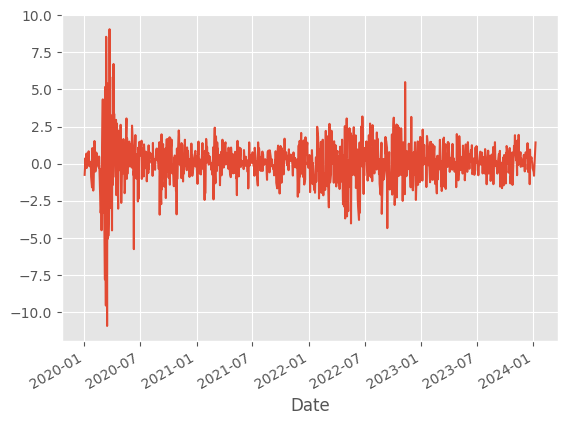

In [37]:
spy_dayily_pc.plot()

In [41]:
# Since the first value is missing data, it is replaced with 0
spy_dayily_pc = (stock["SPY"] - stock["SPY"].shift(1)) / stock["SPY"].shift(1) * 100

In [42]:
spy_dayily_pc.iloc[0] = 0

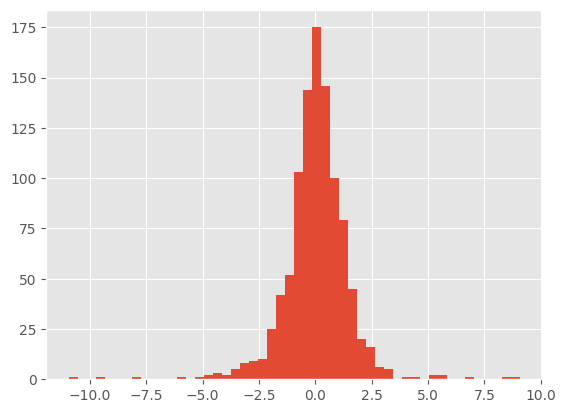

In [44]:
# The frequency is expressed by dividing the daily percentage change of the stock price into 50 sections.
plt.hist(spy_dayily_pc, bins=50)
plt.show()

In [51]:
# Step 7 - Let's create a new data frame that calculates daily stock price changes for all tickers, calculate daily cumulative returns, and analyse the correlation
stock_dayily_pc = (stock - stock.shift(1)) / stock.shift(1) * 100
stock_dayily_pc.head()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.757223,-0.998229,-0.904532,-1.151518,1.540034,0.841354,1.368931
2020-01-06,0.381505,0.616889,0.370054,0.245254,-0.567850,0.119181,1.012827
2020-01-07,-0.281178,0.038053,-0.307239,0.244642,-0.491584,-0.178564,0.401072
2020-01-08,0.532954,0.997507,0.406798,-0.488102,-0.661089,-1.371494,-0.732361


In [52]:
# The formula for the simple daily cumulative return is so simple
# It can be obtained by accumulating and multiply the daily stock price change rate obtained above. We can use the .cumsum() method.
stock_d_cr = stock_dayily_pc.cumsum()

In [53]:
stock_d_cr

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.757223,-0.998229,-0.904532,-1.151518,1.540034,0.841354,1.368931
2020-01-06,-0.375718,-0.381340,-0.534478,-0.906264,0.972184,0.960535,2.381757
2020-01-07,-0.656896,-0.343287,-0.841717,-0.661622,0.480600,0.781971,2.782830
2020-01-08,-0.123942,0.654220,-0.434919,-1.149724,-0.180489,-0.589523,2.050469
...,...,...,...,...,...,...,...
2024-01-02,47.833999,88.353126,31.716947,26.614344,-26.171215,-8.278546,33.587220
2024-01-03,47.017331,87.340744,30.854282,26.131017,-25.754163,-6.913873,32.816806
2024-01-04,46.695223,86.656104,30.735627,26.762388,-27.273612,-7.362635,32.894442


<AxesSubplot:xlabel='Date'>

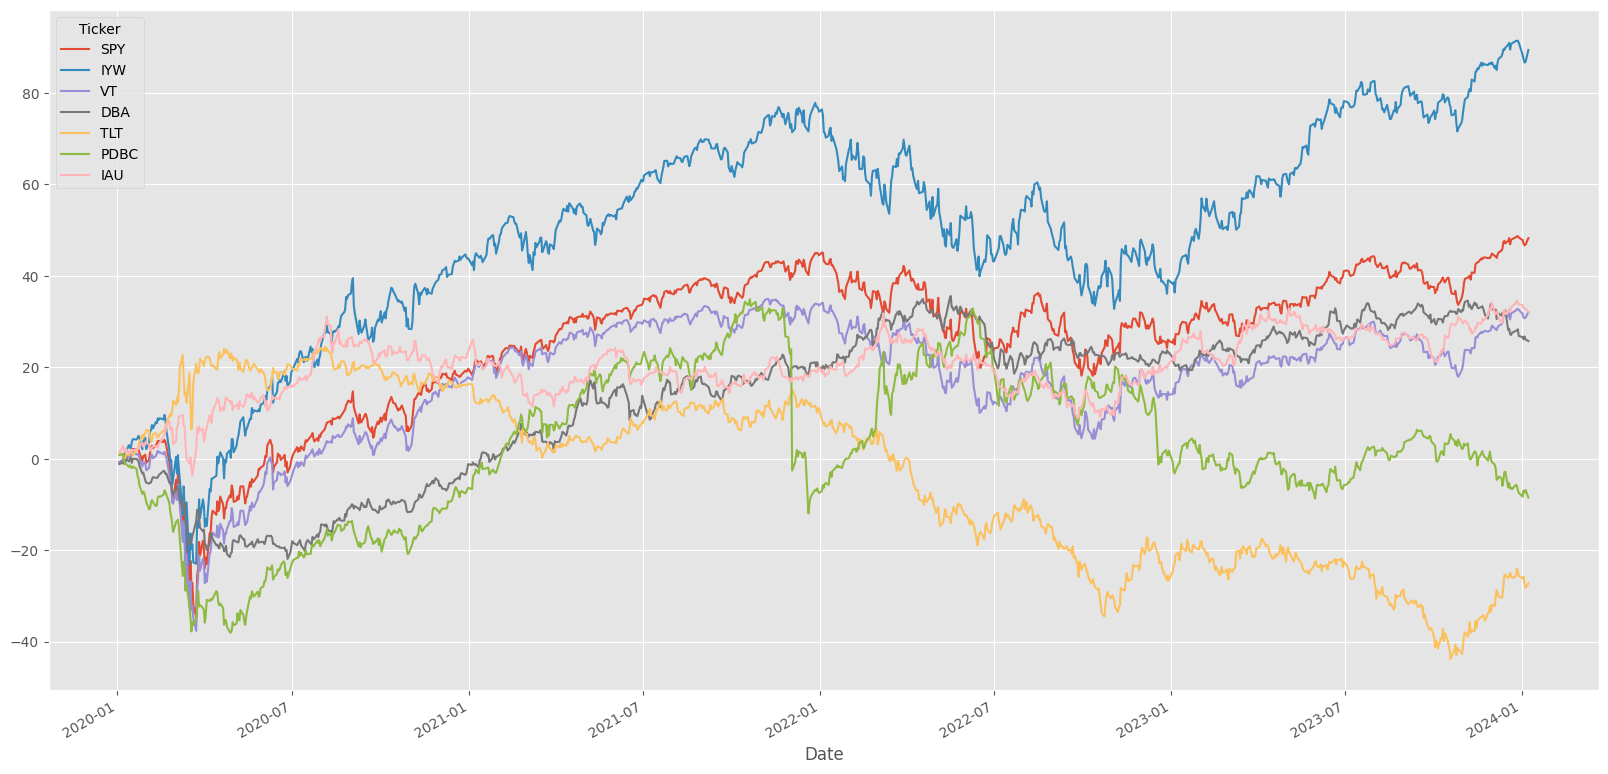

In [54]:
stock_d_cr.plot(figsize = (20, 10))

In [55]:
# Step 8 - The correlation coefficient referes to measuring the strength of the assocication between data as we learned earlier. 
# The close to 1.0, the stronger the relationship, and the closer to 0, the less the relationship. Let's analyze it using the learned .corr()
df_corr = stock_dayily_pc.corr()

In [56]:
df_corr

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Ticker,,,,,,,
SPY,1.000000,0.918779,0.975742,0.247624,-0.175159,0.289986,0.144498
IYW,0.918779,1.000000,0.886955,0.194013,-0.096988,0.218958,0.150493
VT,0.975742,0.886955,1.000000,0.278401,-0.166025,0.323892,0.188105
DBA,0.247624,0.194013,0.278401,1.000000,-0.138407,0.464368,0.183406
TLT,-0.175159,-0.096988,-0.166025,-0.138407,1.000000,-0.122321,0.277059
PDBC,0.289986,0.218958,0.323892,0.464368,-0.122321,1.000000,0.222181
IAU,0.144498,0.150493,0.188105,0.183406,0.277059,0.222181,1.000000


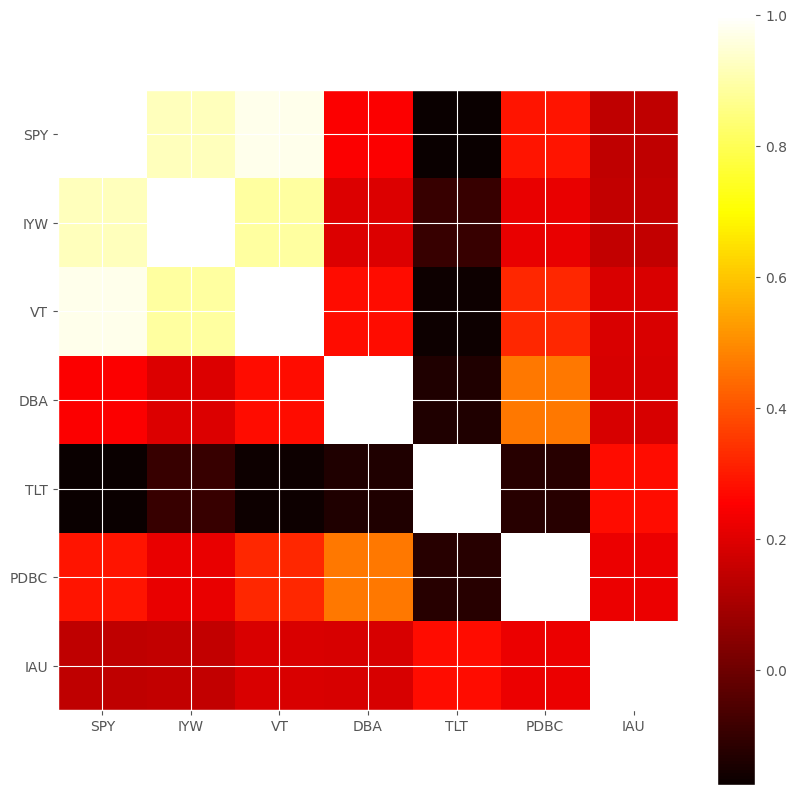

In [57]:
# Let's visualize it as a heatmap
# The darker the color, the lower the correlation, and the brighter the color, the higher the correlation.
# Let's check how each economic factor correlates in the real economy.
plt.imshow(df_corr, cmap = 'hot', interpolation = 'none')
plt.colorbar()
plt.xticks(range(len(df_corr)), df_corr.columns)
plt.yticks(range(len(df_corr)), df_corr.columns)

plt.gcf().set_size_inches(10, 10)

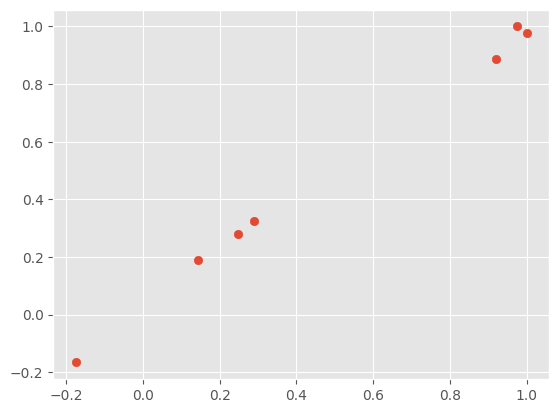

In [58]:
plt.scatter(df_corr.SPY, df_corr.VT)
plt.show()

In [59]:
# Step 9
periods = 75

vol = stock_dayily_pc.rolling(window = periods).std()

vol

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-01-02,0.797187,1.122141,0.804034,0.888573,1.337800,1.092743,0.875041
2024-01-03,0.781362,1.106711,0.804554,0.886153,1.335950,1.107350,0.878017
2024-01-04,0.782721,1.110250,0.801816,0.887250,1.347519,1.107225,0.876319


<AxesSubplot:xlabel='Date'>

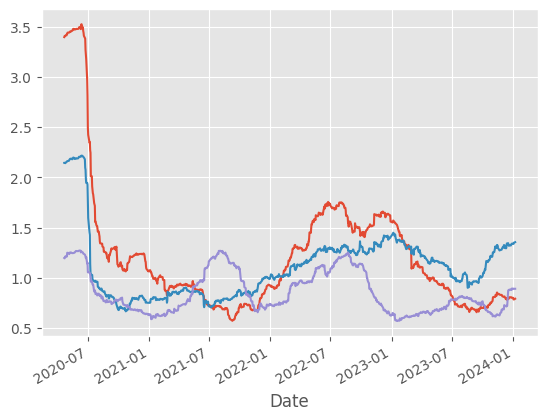

In [60]:
vol['SPY'].plot()
vol['TLT'].plot()
vol['DBA'].plot()